# Correlation

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (8,6)

## Load penguin data

In [3]:
df = pd.read_csv('data/penguins.csv')

In [4]:
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
5,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
6,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
7,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female
8,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male
9,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male


In [5]:
df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


In [6]:
df.corr(method='spearman')

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.213859,0.669754,0.576480
bill_depth_mm,-0.213859,1.000000,-0.517317,-0.429283
flipper_length_mm,0.669754,-0.517317,1.000000,0.840390
body_mass_g,0.576480,-0.429283,0.840390,1.000000


In [7]:
df.corr(method='kendall')

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.118240,0.481989,0.427760
bill_depth_mm,-0.118240,1.000000,-0.277464,-0.192372
flipper_length_mm,0.481989,-0.277464,1.000000,0.661460
body_mass_g,0.427760,-0.192372,0.661460,1.000000


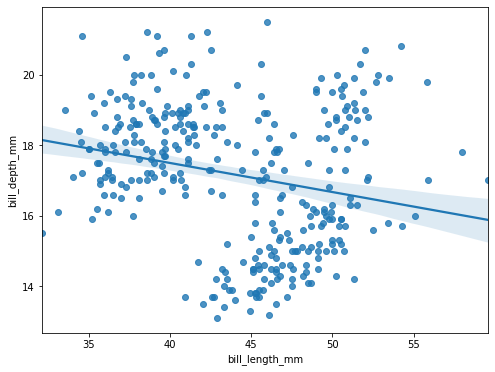

In [19]:
sns.regplot(x='bill_length_mm', y='bill_depth_mm', data=df)

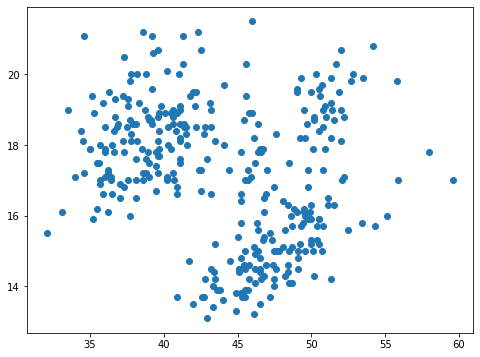

In [9]:
plt.scatter(df.bill_length_mm, df.bill_depth_mm)

In [102]:
r, _ = stats.pearsonr(df.flipper_length_mm, df.body_mass_g)

In [106]:
mx, my =  df[['flipper_length_mm', 'body_mass_g']].mean()
sx, sy = df[['flipper_length_mm', 'body_mass_g']].std()

b = r * sy / sx
a = my - b * mx

In [109]:
x = np.linspace(170,240,100)

Text(0.5, 1.0, 'Pearson correlation')

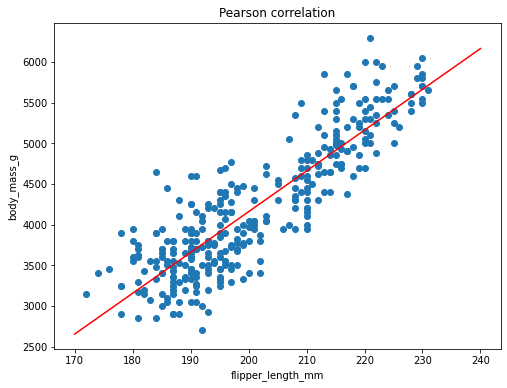

In [111]:
plt.scatter(df.flipper_length_mm, df.body_mass_g)
plt.plot(x, a + b*x, c='red')
plt.gca().set_xlabel('flipper_length_mm')
plt.gca().set_ylabel('body_mass_g')
plt.gca().set_title('Pearson correlation')

In [69]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df.flipper_length_mm, df.body_mass_g)

print('Slope: ',slope)
print('Intercept: ',intercept)
print('r: ', r_value)
print('p_val: ', p_value)
print('std_err: ', std_err)

Slope:  -0.08232675339862275
Intercept:  20.786648668433827
r:  -0.22862563591302898
p_val:  2.5282897209443435e-05
std_err:  0.019268346735778864


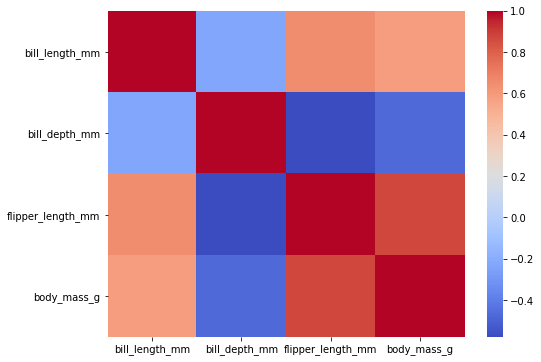

In [35]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [36]:
np.triu_indices_from(mask)

(array([0, 0, 0, 0, 1, 1, 1, 2, 2, 3]), array([0, 1, 2, 3, 1, 2, 3, 2, 3, 3]))

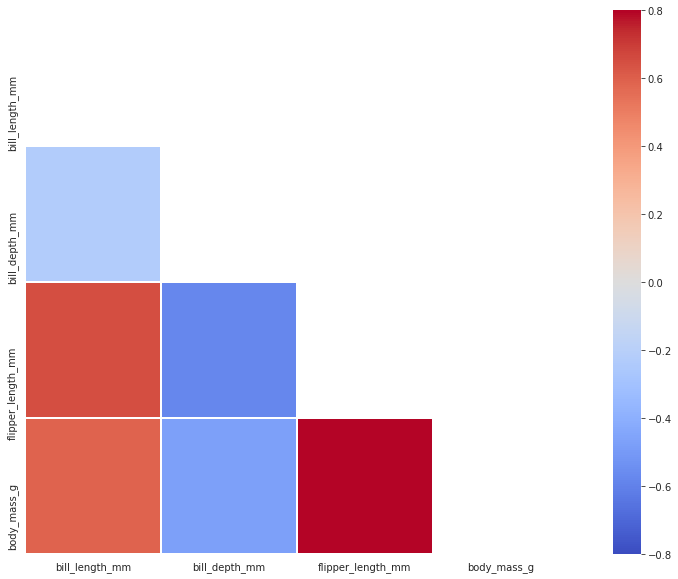

In [38]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(df.corr(), mask=mask,
                     square=True, linewidths=1, cmap="coolwarm",
                     vmax = 0.8, vmin = -0.8)

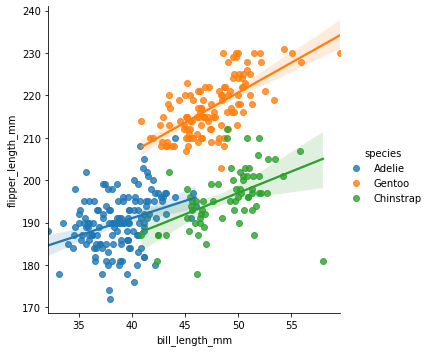

In [55]:
sns.lmplot(x='bill_length_mm', y='flipper_length_mm', data=df, hue='species', fit_reg=True)

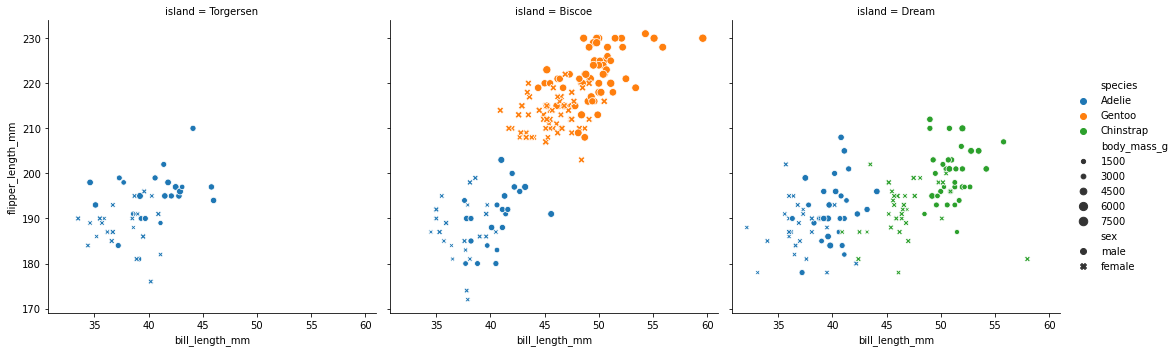

In [35]:
sns.relplot(x='bill_length_mm', y='flipper_length_mm', hue='species', style='sex', col='island', size='body_mass_g', data=df)

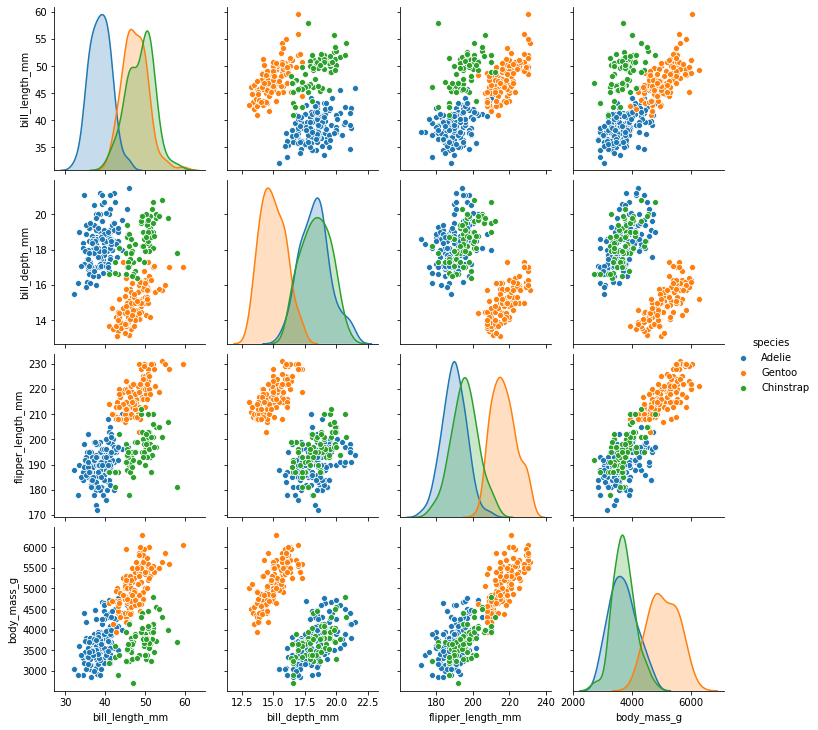

In [41]:
sns.pairplot(df, hue='species')

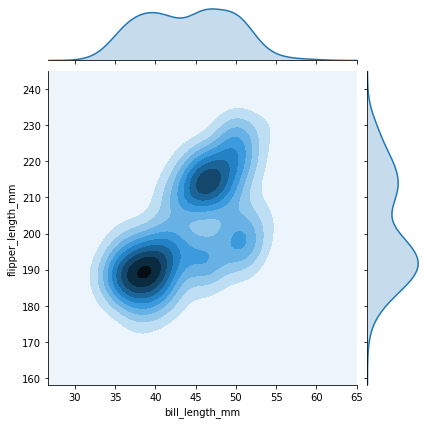

In [45]:
jp = sns.jointplot("bill_length_mm", "flipper_length_mm", data=df, kind='kde')

## Pivot tables

In [46]:
flights = sns.load_dataset('flights')

In [47]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [50]:
fp = flights.pivot_table(index='month', columns='year', values='passengers')

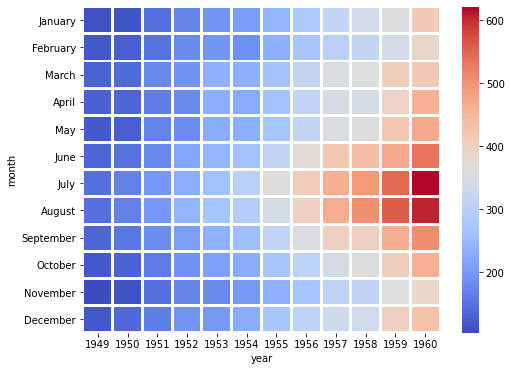

In [51]:
# Create heat map
sns.heatmap(fp, cmap = 'coolwarm', linecolor = 'white',linewidths = 2)

In [63]:
df.crosstab(index='island', columns='species')

AttributeError: 'DataFrame' object has no attribute 'crosstab'

In [68]:
df.pivot_table(index='island', columns='species', aggfunc='mean', values='body_mass_g')

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,3709.659091,NaN,5092.436975
Dream,3701.363636,3733.088235,NaN
Torgersen,3708.510638,NaN,NaN


In [112]:
help(df.melt)

Help on method melt in module pandas.core.frame:

melt(id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.
    
    This function is useful to massage a DataFrame into a format where one
    or more columns are identifier variables (`id_vars`), while all other
    columns, considered measured variables (`value_vars`), are "unpivoted" to
    the row axis, leaving just two non-identifier columns, 'variable' and
    'value'.
    .. versionadded:: 0.20.0
    
    Parameters
    ----------
    id_vars : tuple, list, or ndarray, optional
        Column(s) to use as identifier variables.
    value_vars : tuple, list, or ndarray, optional
        Column(s) to unpivot. If not specified, uses all columns that
        are not set as `id_vars`.
    var_name : scalar
        Name to use for the 'variable' column. If None it